useful: 
* http://localhost:8888/notebooks/UofM-VIRT-DATA-PT-09-2024-U-LOLC/06-Python-APIs/2/Activities/07-Stu_Weather_Stats/Solved/weather_stats_solution.ipynb?
* http://localhost:8888/notebooks/UofM-VIRT-DATA-PT-09-2024-U-LOLC/05-Data-Visualization/2/Activities/06-Stu_MilesPerGallon-ScatterPlot/Solved/mpg_solution.ipynb?
* http://localhost:8888/notebooks/UofM-VIRT-DATA-PT-09-2024-U-LOLC/06-Python-APIs/2/Activities/05-Ins_OpenWeatherDataFrame/Solved/open_weather_dataframe_solution.ipynb?
* http://localhost:8888/notebooks/UofM-VIRT-DATA-PT-09-2024-U-LOLC/06-Python-APIs/3/Activities/02-Ins_Geoapify_Places/Solved/places_solution.ipynb?
* http://localhost:8888/notebooks/UofM-VIRT-DATA-PT-09-2024-U-LOLC/06-Python-APIs/3/Activities/04-Ins_Nearest-Restaurants/Solved/restaurants_solution.ipynb?



# WeatherPy
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
city = 'Minneapolis'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='
response = requests.get(base_url + city).json() # PLUS not comma
print(json.dumps(response, indent=4))

{
    "coord": {
        "lon": -93.2638,
        "lat": 44.98
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 276.77,
        "feels_like": 272.44,
        "temp_min": 276.01,
        "temp_max": 277.84,
        "pressure": 1019,
        "humidity": 84,
        "sea_level": 1019,
        "grnd_level": 986
    },
    "visibility": 10000,
    "wind": {
        "speed": 5.66,
        "deg": 140,
        "gust": 9.26
    },
    "clouds": {
        "all": 40
    },
    "dt": 1731479813,
    "sys": {
        "type": 2,
        "id": 2012563,
        "country": "US",
        "sunrise": 1731503326,
        "sunset": 1731537977
    },
    "timezone": -21600,
    "id": 5037649,
    "name": "Minneapolis",
    "cod": 200
}


In [34]:
# Set the API base URL
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tamanrasset
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | basco
Processing Record 5 of Set 1 | fort st. john
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | banda aceh
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | dadonghai
City not found. Skipping...
Processing Record 10 of Set 1 | callao
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | tshikapa
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | severo-yeniseyskiy
Processing Record 16 of Set 1 | port douglas
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | xining
Processing Reco

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tamanrasset,22.7850,5.5228,282.10,37,0,2.06,DZ,1731480255
1,bethel,41.3712,-73.4140,275.49,61,0,0.89,US,1731480257
2,okhotsk,59.3833,143.3000,258.63,70,11,7.16,RU,1731480258
3,basco,20.4487,121.9702,299.98,89,65,6.50,PH,1731480259
4,fort st. john,56.2499,-120.8529,266.09,93,75,2.06,CA,1731480260


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tamanrasset,22.7850,5.5228,282.10,37,0,2.06,DZ,1731480255
1,bethel,41.3712,-73.4140,275.49,61,0,0.89,US,1731480257
2,okhotsk,59.3833,143.3000,258.63,70,11,7.16,RU,1731480258
3,basco,20.4487,121.9702,299.98,89,65,6.50,PH,1731480259
4,fort st. john,56.2499,-120.8529,266.09,93,75,2.06,CA,1731480260


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

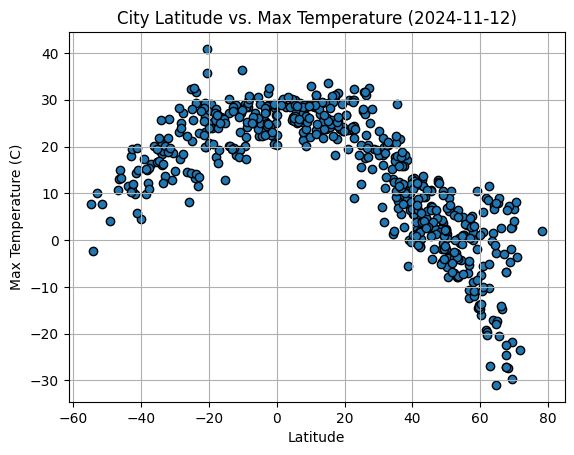

In [17]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp'] - 273.15
scatter1 = plt.scatter(x,y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Latitude vs. Max Temperature (2024-11-12)")
scatter1.set_edgecolor('black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

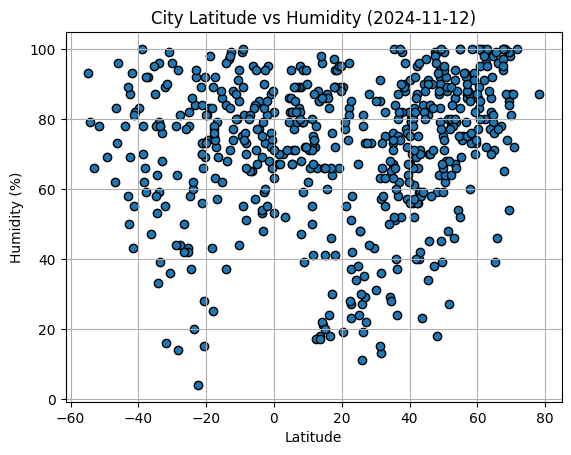

In [21]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
scatter2 = plt.scatter(x,y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity (2024-11-12)")
plt.grid()
scatter2.set_edgecolor('black')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

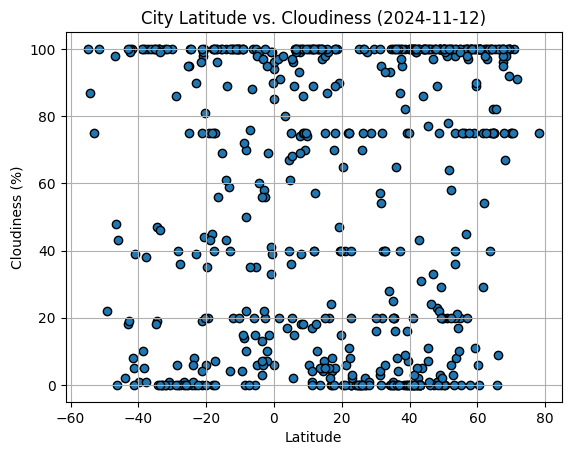

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
scatter3 = plt.scatter(x,y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-11-12)")
scatter3.set_edgecolor('black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

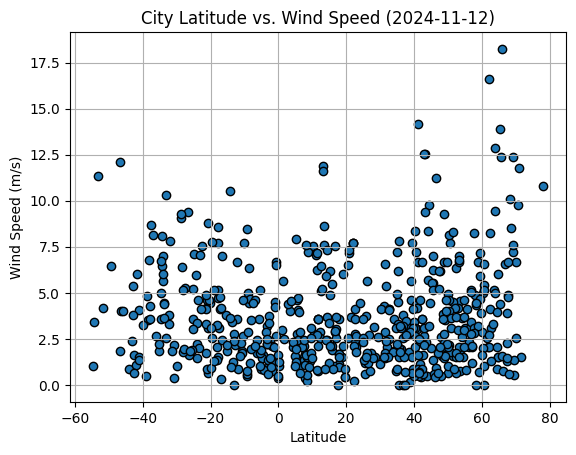

In [23]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
scatter4 = plt.scatter(x,y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-11-12)")
scatter4.set_edgecolor('black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object', name='info')

In [124]:
# Define a function to create Linear Regression plots
def regress_plot(df):
    independent = input('*** enter *INDEPENDENT* variable ***').title()
    dependent = input('*** enter *DEPENDENT* variable ***').title()
    x = df[independent]
    y = df[dependent]
    
    # Conversions if necessary
    if dependent == 'Max Temp':
        y = y - 273.15
        dependent = dependent + 'erature'
    if independent == 'Lat':
        independent = independent + 'itude'
    
    # Create plot
    plt.scatter(x,y)
    plt.xlabel(independent)
    plt.ylabel(dependent)
    plt.title(f'{independent} vs. {dependent}')

    # Add regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_y = (slope * x) + intercept
    regress_line = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.plot(x, regress_y, color='red')

    # Print r-squared value
    print(f'Line of best fit: {regress_line}')
    print(f'The r^2-value is: {rvalue**2}')
    
    # Show
    plt.show()

In [ ]:
# Define a function to create Linear Regression plots
def regress_plot(df):
    independent = input('*** enter *INDEPENDENT* variable ***').title()
    dependent = input('*** enter *DEPENDENT* variable ***').title()
    x = df[independent]
    y = df[dependent]
    
    # Conversions if necessary
    if dependent is 'Max Temp':
        y = y - 273.15
        ylabel = 
    if x is df['Lat']:
        xlabel = 'Latitude'
    else:
        xlabel = independent
    
    # Create plot
    plt.scatter(x,y)
    plt.xlabel(input('     x-axis label   '))
    plt.ylabel(input('     y-axis label   '))
    plt.title(input('     plot title   '))

    # Add regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_y = (slope * x) + intercept
    regress_line = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.plot(x, regress_y, color='red')

    # Print r-squared value
    print(f'Line of best fit: {regress_line}')
    print(f'The r^2-value is: {rvalue**2}')
    
    # Show
    plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

info,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tamanrasset,22.7850,5.5228,282.10,37,0,2.06,DZ,1731480255
1,bethel,41.3712,-73.4140,275.49,61,0,0.89,US,1731480257
2,okhotsk,59.3833,143.3000,258.63,70,11,7.16,RU,1731480258
3,basco,20.4487,121.9702,299.98,89,65,6.50,PH,1731480259
4,fort st. john,56.2499,-120.8529,266.09,93,75,2.06,CA,1731480260


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

info,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,277.23,69,22,6.48,TF,1731480261
8,callao,-12.0667,-77.1500,292.44,77,100,3.60,PE,1731480203
10,grytviken,-54.2811,-36.5092,270.81,79,87,3.39,GS,1731480268
11,tshikapa,-6.4167,20.8000,300.40,65,88,1.71,CD,1731480269
12,west island,-12.1568,96.8225,302.14,74,20,6.69,CC,1731480270


###  Temperature vs. Latitude Linear Regression Plot

Line of best fit: y = -0.64x + 34.61
The r^2-value is: 0.7582580522770388


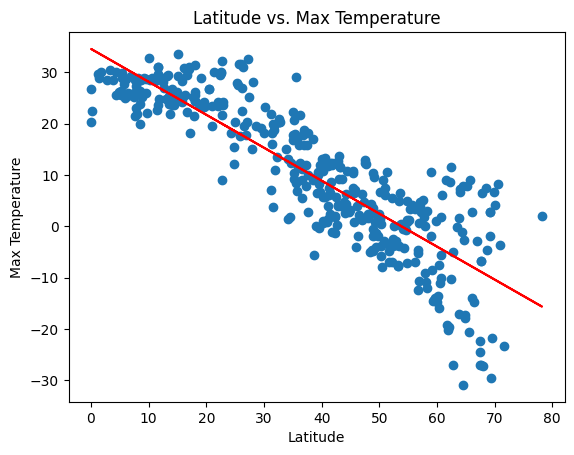

In [125]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df)

Line of best fit: y = 0.33x + 28.83
The r^2-value is: 0.4653353351872119


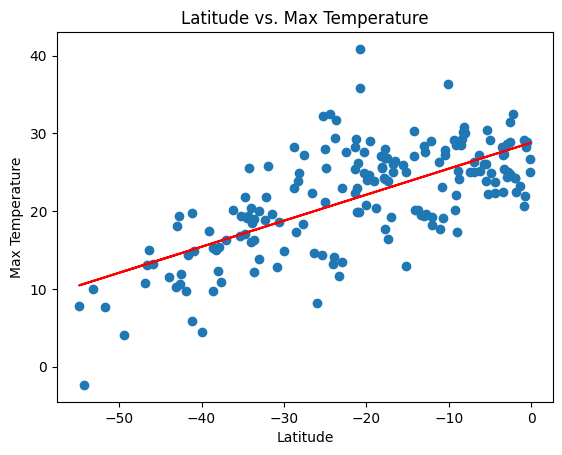

In [126]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot


      
-------------------------------      
----- NORTHERN HEMISPHERE -----
-------------------------------
      
Line of best fit: y = 0.29x + 61.3
The r^2-value is: 0.07403302040695066


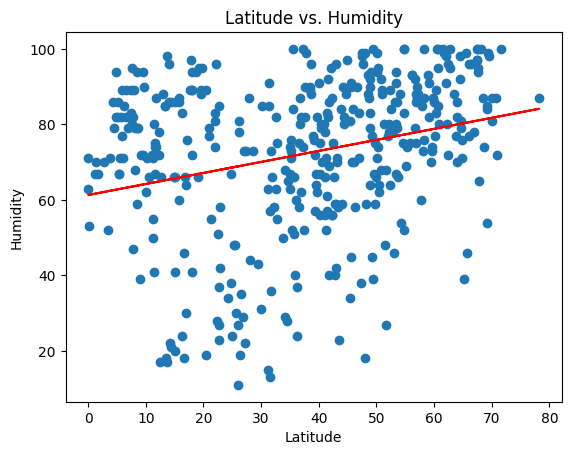


      
-------------------------------
----- SOUTHERN HEMISPHERE -----
-------------------------------
      
Line of best fit: y = 0.12x + 74.6
The r^2-value is: 0.008095732771062044


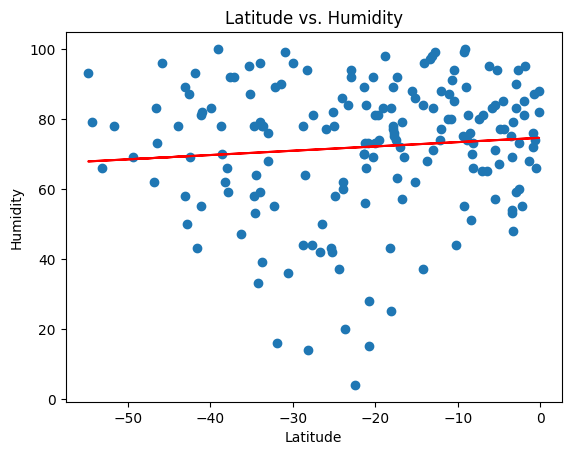

In [ ]:
print('''
      
-------------------------------      
----- NORTHERN HEMISPHERE -----
-------------------------------
      ''')
regress_plot(northern_hemi_df)

print('''
      
-------------------------------
----- SOUTHERN HEMISPHERE -----
-------------------------------
      ''')
regress_plot(southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Line of best fit: y = 0.38x + 43.36
The r^2-value is: 0.030901231510179556


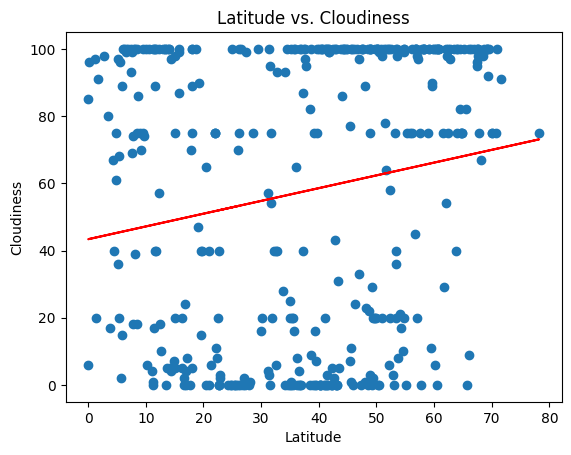

In [132]:
# Northern Hemisphere
regress_plot(northern_hemi_df)

Line of best fit: y = 0.12x + 74.6
The r^2-value is: 0.008095732771062044


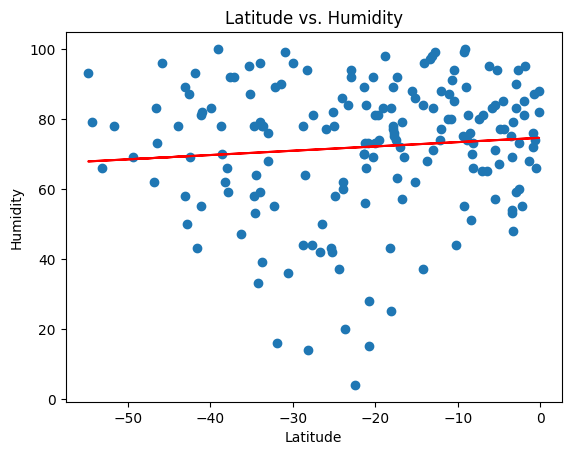

In [133]:
# Southern Hemisphere
regress_plot(southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Line of best fit: y = 0.03x + 2.6
The r^2-value is: 0.035175305387659506


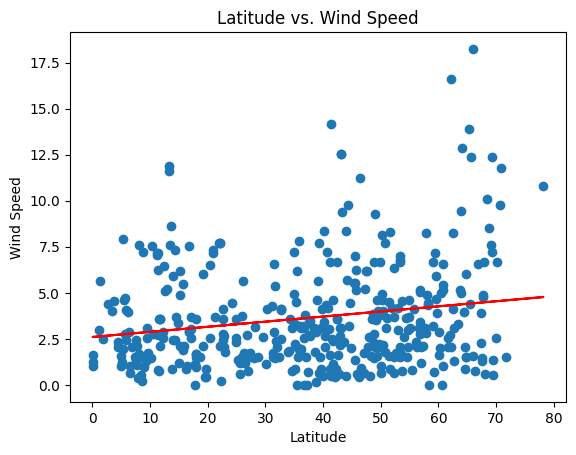

In [134]:
# Northern Hemisphere
regress_plot(northern_hemi_df)

Line of best fit: y = -0.05x + 2.66
The r^2-value is: 0.06995026570028409


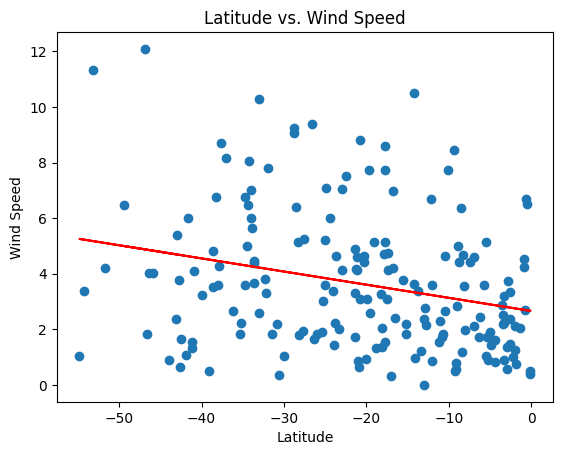

In [136]:
# Southern Hemisphere
regress_plot(southern_hemi_df)

**Discussion about the linear relationship:** YOUR RESPONSE HERE